In [1]:
# opXRD: How to load the database

from opxrd import OpXRD

opxrd_location = '/tmp/opxrd'
opxrd = OpXRD.load(dirpath=opxrd_location)

ImportError: cannot import name 'SaveManager' from 'holytools.fsys' (/home/daniel/aimat/opXRD/.venv/lib/python3.12/site-packages/holytools/fsys/__init__.py)

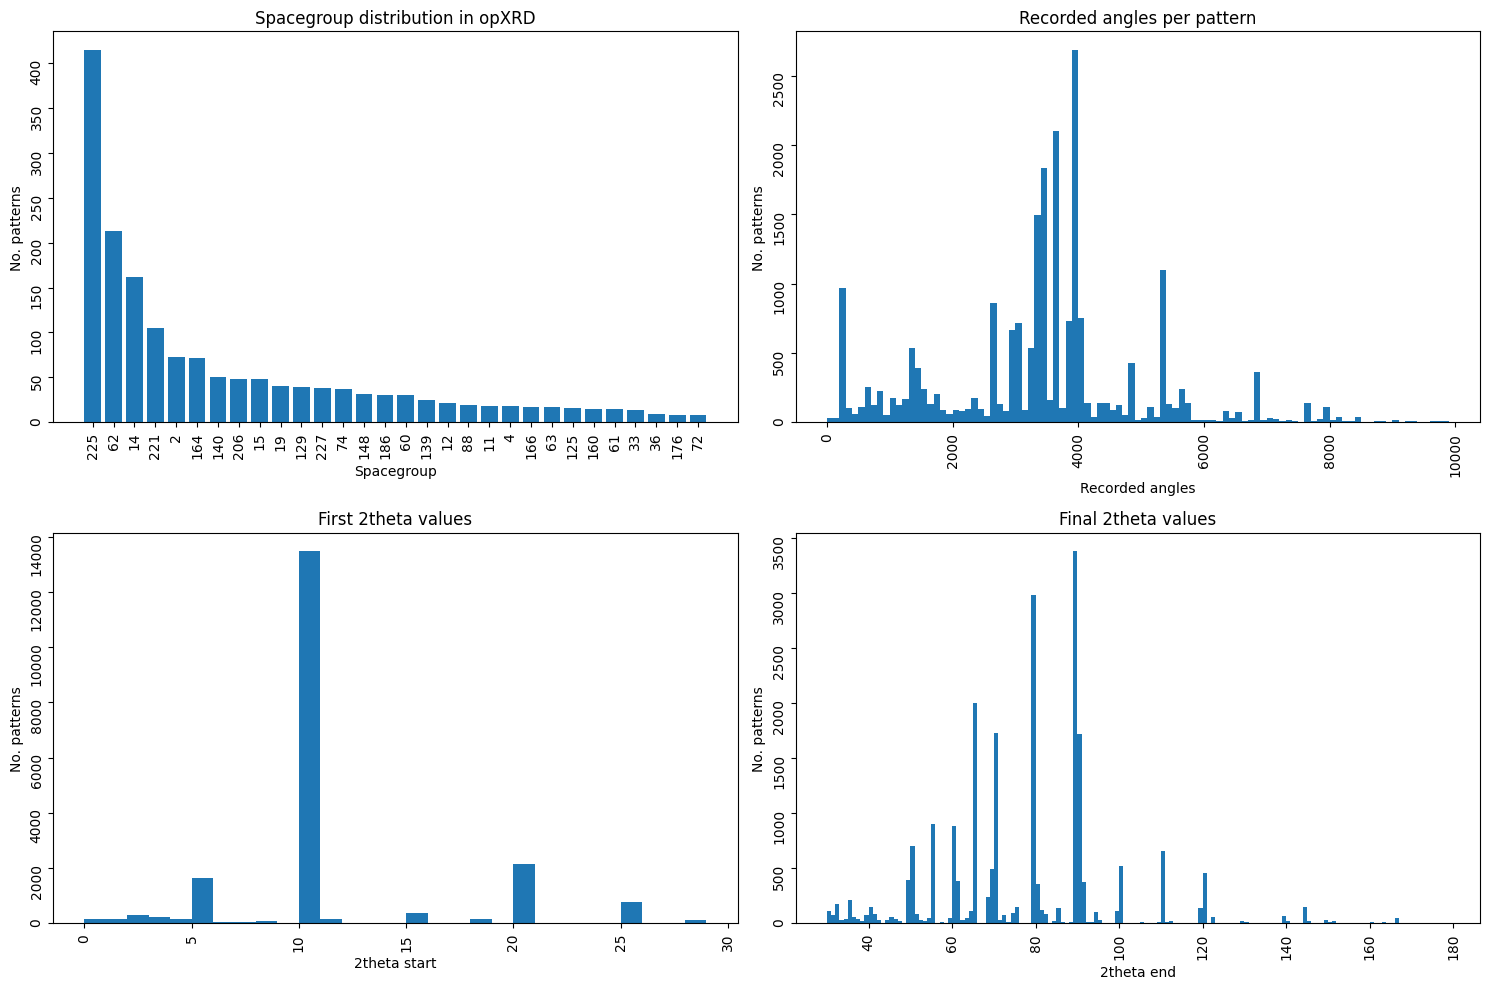

In [3]:
# opXRD: Show database statistics
opxrd.show_histograms(save_fpath='/tmp/quantities_hist.png')

In [4]:
# opXRD: How to access patterns

opxrd_pattern = opxrd.patterns[0]
print(f'First 20 angles of the first pattern: {opxrd_pattern.two_theta_values[:20]}')
print(f'First 20 intensities of the first pattern: {opxrd_pattern.intensities[:20]}')

First 20 angles of the first pattern: [10.         10.01500375 10.03000749 10.04501124 10.06001499 10.07501873
 10.09002248 10.10502623 10.12002997 10.13503372 10.15003747 10.16504121
 10.18004496 10.19504871 10.21005245 10.2250562  10.24005995 10.25506369
 10.27006744 10.28507119]
First 20 intensities of the first pattern: [4058. 3997. 3962. 3992. 3952. 3944. 3957. 3953. 3994. 3942. 4039. 3972.
 3810. 3942. 3981. 4059. 3973. 3965. 3989. 3901.]


In [5]:
# XrdPattern: Loading individual patterns

import sys

stdout = sys.stdout
from xrdpattern.pattern import XrdPattern
from xrdpattern.parsing.examples import DataExamples

pattern = XrdPattern.load(fpath=DataExamples.get_aimat_fpath())
sys.stdout = stdout

--- Successfully processed file ---
Data file path: /home/daniel/aimat/xrdpattern/xrdpattern/examples/aimat.json
Num errors: 0


In [6]:
#XrdPattern: Standardize

x1,y1, = pattern.get_pattern_data(apply_standardization=True)
print(f'Minimum, maximum value of y = {min(y1)}, {max(y1)}')
print(f'Two theta values start, end at {x1[0]}, {x1[-1]}')

Minimum, maximum value of y = 0.0, 1.0
Two theta values start, end at 0.0, 90.0


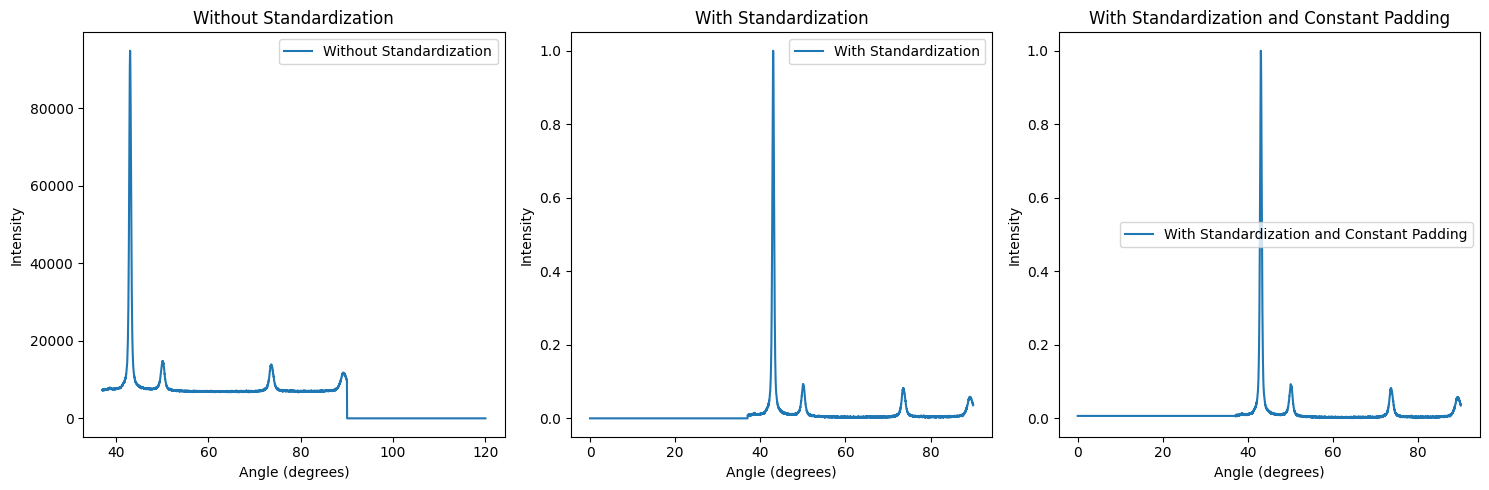

In [7]:
# XrdPattern: Plot patterns
import matplotlib.pyplot as plt

a1, i1 = pattern.get_pattern_data(apply_standardization=False)
a2, i2 = pattern.get_pattern_data(apply_standardization=True)
a3, i3 = pattern.get_pattern_data(apply_standardization=True, apply_constant_padding=True)

plt.figure(figsize=(15, 5))
titles = ['Without Standardization', 'With Standardization', 'With Standardization and Constant Padding']
data = [(a1, i1), (a2, i2), (a3, i3)]

for idx, (angles, intensities) in enumerate(data):
    plt.subplot(1, 3, idx + 1)
    plt.plot(angles, intensities, label=titles[idx])
    plt.title(titles[idx])
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Intensity')
    plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# XrdPattern: To tensor (Coming soon!)
#import torch
#pattern.to_tensorpair(dtype=torch.float32, device=torch.device('cuda'))